In [18]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt
%matplotlib inline

In [19]:
data = pd.read_csv('../data/Data_crimeMinMaxScaled.csv', index_col=0)
data.head()

,GardenCounts,HasGarden,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_Other,Edu_Bachelor,Edu_GradProf,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
NTA,,,,,,,,,,,,,,,,,,,,
Bath Beach,0.0,0.0,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.0,0.0,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,0.011752,0.015232,0.027670,0.015315
Bedford,23.0,1.0,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455,0.028667,0.023144,0.038305,0.026313
Bensonhurst East,1.0,1.0,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283,0.010267,0.008911,0.017379,0.010138
Bensonhurst West,2.0,1.0,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582,0.009682,0.008536,0.015215,0.009528


In [20]:
y = data[['HasGarden', 'GardenCounts']]
X = data.drop(columns=['HasGarden', 'GardenCounts'])
X.head(2)

,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_Other,Edu_Bachelor,Edu_GradProf,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
NTA,,,,,,,,,,,,,,,,,,
Bath Beach,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,0.011752,0.015232,0.027670,0.015315


# See characteristics for NTAs with and without gardens

In [21]:
from sklearn.decomposition import PCA

pca = PCA(X.shape[1]).fit(X)
pca_model = pca.transform(X)
pca.explained_variance_ratio_.cumsum()[:5] 
# first 2 components explains 70%

array([0.52158425, 0.70379712, 0.81021923, 0.88688796, 0.95221807])

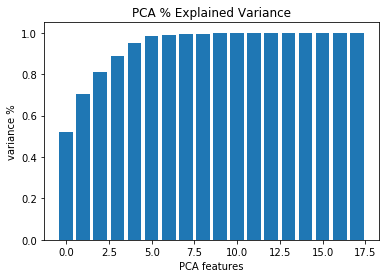

In [34]:
plt.bar(range(len(pca.components_)), pca.explained_variance_ratio_.cumsum())
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.title('PCA % Explained Variance')
plt.show()

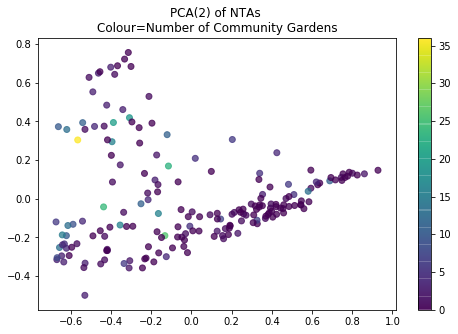

In [28]:
#2-d plot
fig = plt.figure(figsize=(8,5))

plt.scatter(x=pca_model[:, 0], y=pca_model[:, 1], c=y['GardenCounts'], alpha=0.75)
plt.title('PCA(2) of NTAs \nColour=Number of Community Gardens')
plt.colorbar()

Text(0.5,1,'PCA(2) of NTAs \n(Yellow=Has garden(s), Purple=No garden)')

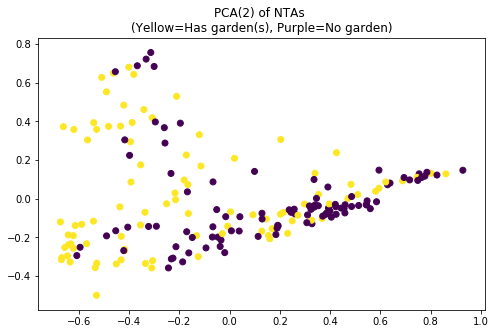

In [33]:
#2-d plot
fig = plt.figure(figsize=(8,5))

plt.scatter(x=pca_model[:, 0], y=pca_model[:, 1], c=y['HasGarden'])
plt.title('PCA(2) of NTAs \n(Yellow=Has garden(s), Purple=No garden)')